# Brief Métier : Exploitation des Données Scrappées avec Pandas

## Contexte Professionnel

Après la phase de **scraping** réalisée sur des sites concurrents de Castorama, vous avez obtenu deux fichiers CSV :

- categories.csv : contenant les informations relatives aux catégories et sous-catégories.
- products.csv : contenant les informations relatives aux produits (nom, prix, disponibilité, promotions, etc.).

En tant que **Data Analyst / Data Engineer**, votre rôle est désormais de **nettoyer**, **préparer** et **analyser** ces données afin d’en extraire des **informations pertinentes**. Ces informations permettront à Castorama de mieux comprendre l’état du marché, de mettre en place une stratégie tarifaire compétitive et d'anticiper les tendances.

## Installations

In [ ]:
%pip install --upgrade pip
%pip install ipykernel
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

## Importations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import re

## Chargement des Données

In [2]:
# Load category data
category_data = pd.read_csv("castorama_categories.csv")

# Load products data
product_data = pd.read_csv("castorama_products.csv")

In [ ]:
# Confirm category data loaded correctly
category_data

In [ ]:
# Confirm product data loaded correctly
product_data

## Exploration

### Aperçu des données

In [ ]:
# Get information about category_data
category_data.info()

In [ ]:
# Get information about product_data
product_data.info()

In [ ]:
# View category_data summary statistics 
category_data.describe()

In [ ]:
# View product_data summary statistics 
product_data.describe()

In [ ]:
# View first 5 data in category_data
category_data.head()

In [ ]:
# View first 5 data in product_data
product_data.head()

## Nettoyage et Préparation des Données

### Category_data.csv

In [3]:
# Duplicate raw data
cdf = category_data.copy()

In [ ]:
# Check for missing data
cdf.isna().sum()

In [4]:
# View duplicated categories 
duplicates = cdf[cdf["category"].duplicated(keep=False)]

In [ ]:
# Sort duplicates to understand patterns
duplicates.sort_values(by=['is_page_list','category', 'url'], ascending=False)

In [ ]:
# Sort data by the specified columns
cdf.sort_values(by=['is_page_list','category', 'url'], ascending=False)

In [ ]:
# Drop duplicates (keep only first occurrence)
cdf.drop_duplicates(subset=["category"], inplace=True, keep='first')

# View data
cdf.describe()

In [ ]:
# View duplicated urls
duplicated_urls = cdf[cdf["url"].duplicated(keep=False)]

# Sort by url
duplicates_sorted = duplicated_urls.sort_values(by="is_page_list", ascending=False)

# View data
duplicates_sorted

In [ ]:
# Sort data by "is_page_list"
cdf.sort_values(by='is_page_list', ascending=False)

In [ ]:
# Drop duplicate urls (Observation: Double is_page_list created for SEO and Diacritics)

cdf.drop_duplicates(subset=["url"], inplace=True, keep='first')

# Summarize data
cdf.describe()

- Manipulation de chaînes :

In [8]:
# Remove trailing spaces and characters in category name
cdf["category"] = cdf["category"].str.strip()

In [9]:
# Convert category names to lowercase
cdf['category'] = cdf['category'].str.lower()

In [10]:
# Handling encoding issues (trailing underscores, Prefix 0s, multiple underscores) in specified columns
# Replace spaces, commas, apostrophes with underscore

# Define function to clean category texts
def clean_text(input_str):
    if pd.isnull(input_str):  # Handle NaN values
        return input_str
    input_str = str(input_str)  # Ensure the input is a string
    input_str = re.sub(r'[\u002D\u2010\u2011\u2012\u2013\u2014\u2212]', '_', input_str) # Replace all hyphen types
    input_str = re.sub(r'\s+', '_', input_str.strip())  # Replace all whitespace with underscores
    input_str = input_str.replace(',', '_')  # Replace commas with underscores
    input_str = input_str.replace("'", '_')  # Replace apostrophes with underscores
    input_str = input_str.replace('\xa0', '_')  # Replace non-breaking spaces
    input_str = re.sub(r'_+', '_', input_str)  # Remove multiple underscores
    input_str = re.sub(r'^_|_$', '', input_str)  # Remove leading or trailing underscores
    input_str = re.sub(r'^0+', '', input_str)  # Remove leading zeros
    return input_str

# Apply function
cdf['category'] = cdf['category'].map(clean_text)

In [11]:
# Declare text replacement characters
replacements = {"à": "a", "á": "a", "â": "a", "ä": "a", "ç" : "c",
                "é": "e", "è": "e", "ê": "e", "ë": "e", "É":"E", "È":"E",
                "î": "i", "ï":"i", "ì": "i", "í": "i",
                "ö": "o", "ô": "o", "ò": "o", "ó": "o",
                "ü": "u", "û": "u", "ù": "u", "ú": "u"}

# Define function to replace accented category texts
def replace_accents(input_str, replacement):
    for old, new in replacement.items():
        input_str = input_str.replace(old, new)
    return input_str

# Apply function to remove accents
cdf["category"] = cdf["category"].apply(lambda x: replace_accents(str(x), replacements))

In [ ]:
# Review for errors or duplicates
cdf.sort_values(by='category')

In [ ]:
# Verify again if duplicates persists
c_duplicates = cdf[cdf['category'].duplicated(keep=False)]

# Sort by category
c_duplicates.sort_values(by='category')

In [14]:
# Sort by is_page_list
cdf_sorted = cdf.sort_values(by="is_page_list", ascending=False)

In [15]:
# Drop newly found duplicates (SEO / Diacritics related, keep only "True" is_page_lists)
cdf_no_duplicates = cdf_sorted.drop_duplicates(subset=['category'], keep='first')

In [16]:
# Sort by original index
cdf_no_duplicates = cdf_no_duplicates.sort_index()

In [17]:
# Duplicate original index
cdf_no_duplicates["original_index"] = cdf_no_duplicates.index

In [18]:
# Reset index
categories_cleaned = cdf_no_duplicates.reset_index(drop=True)

In [19]:
# Exclude original index from final copy
categories_cleaned_final = categories_cleaned[['category', 'is_page_list', 'url']]

In [39]:
# Export cleaned data
categories_cleaned_final.to_csv("categories_cleaned_final.csv", index=False)

### Product_data.csv

In [106]:
# Duplicate raw product data
pdf = product_data.copy()

In [ ]:
# Get info about products data
pdf.info()

In [ ]:
# Get summary statistics/info
pdf.describe()

In [ ]:
# Check for missing values (general)
pdf.isna()

In [ ]:
# Check for missing values in unique_id column
pdf["unique_id"].isna().value_counts()

In [ ]:
# Check for missing values (category column)
pdf["category"].isna().value_counts()

In [ ]:
# Check for missing values (subcategory column)
pdf["subcategory"].isna().value_counts()

In [ ]:
# Check for missing values (subsubcategory column)
pdf["subsubcategory"].isna().value_counts()

In [ ]:
# Check for missing values (subsubsubcategory column)
pdf["subsubsubcategory"].isna().value_counts()

In [ ]:
# Check for missing values (price column)
pdf["price"].isna().value_counts()

In [ ]:
# Check for missing values (title column) 
pdf["title"].isna().value_counts()

In [ ]:
# Check for missing values (url column)
pdf["url"].isna().value_counts()

In [ ]:
# Show summary statistics
pdf.describe()

In [ ]:
# View duplicates (if any)
duplicates_in_pdf = pdf[pdf.duplicated(subset="title", keep=False)]

duplicates_in_pdf

# Note: Duplicates were not removed because each entry represents a distinct variation of a product (e.g., different color or size) with a unique ID. 
# While some fields like title, category, or subcategory may be identical, these variations provide important granularity for analysis.

- Manipulation de chaînes :

In [ ]:
# Replace NaNs
pdf['subsubsubcategory'] = pdf['subsubsubcategory'].fillna("Not_available")

In [51]:
# Convert specified columns to lowercase 
columns_to_lowercase = ['category', 'subcategory', 'subsubcategory', 'subsubsubcategory', 'title']
pdf[columns_to_lowercase] = pdf[columns_to_lowercase].apply(lambda x: x.str.lower())

In [52]:
# Strip values in the specified columns 
columns_to_strip = ['category', 'subcategory', 'subsubcategory', 'subsubsubcategory', 'title']
pdf[columns_to_strip] = pdf[columns_to_strip].apply(lambda x: x.str.strip())

In [53]:
# Handling encoding issues (trailing underscores, Prefix 0s, multiple underscores) in specified columns
# Replace spaces, commas, apostrophes with underscore

columns_to_replace = ['category', 'subcategory', 'subsubcategory', 'subsubsubcategory', 'title']

def clean_text(input_str):
    if pd.isnull(input_str):  # Handle NaN values
        return input_str
    input_str = str(input_str)  # Ensure the input is a string
    input_str = re.sub(r'[\u002D\u2010\u2011\u2012\u2013\u2014\u2212]', '_', input_str) # Replace all hyphen types
    input_str = re.sub(r'\s+', '_', input_str.strip())  # Replace all whitespace with underscores
    input_str = input_str.replace(',', '_')  # Replace commas with underscores
    input_str = input_str.replace("'", '_')  # Replace apostrophes with underscores
    input_str = re.sub(r'_+', '_', input_str)  # Remove multiple underscores
    input_str = re.sub(r'^_|_$', '', input_str)  # Remove leading or trailing underscores
    input_str = re.sub(r'^0+', '', input_str)  # Remove leading zeros
    return input_str

pdf[columns_to_replace] = pdf[columns_to_replace].map(clean_text)

In [54]:
# Replace accented letters in the specified columns' texts

# Define function to remove accented letters
def robust_remove_accents(input_str):
    normalized = unicodedata.normalize('NFD', input_str) # Normalize to decomposed form
    without_accents = ''.join(c for c in normalized if unicodedata.category(c) != 'Mn') # Remove combining characters (accents)

    # Explicitly replace problematic characters (if any remains)
    replacements = {"à": "a", "á": "a", "â": "a", "ä": "a", "ç": "c", "ć": "c",
                "é": "e", "è": "e", "ê": "e", "ë": "e", "É":"E", "È":"E",
                "î": "i", "ï":"i", "ì": "i", "í": "i",
                "ö": "o", "ô": "o", "ò": "o", "ó": "o",
                "ü": "u", "û": "u", "ù": "u", "ú": "u"}

    for accented_char, replacement in replacements.items():
        without_accents = without_accents.replace(accented_char, replacement)
    
    # Handle lingering issues and strip
    return without_accents.replace('\xa0', ' ').strip()

# Apply function
pdf[columns_to_replace] = pdf[columns_to_replace].map(
    lambda x: robust_remove_accents(str(x)) if isinstance(x, str) else x)

In [ ]:
# Replace commans with full stops and remove spaces bewteen numbers
pdf['price'] = pdf['price'].apply(lambda x: x.replace(",", "."))
pdf['price'] = pdf['price'].apply(lambda x: x.replace(" ", ""))

# Convert price column to float type
pdf['price'] = pd.to_numeric(pdf['price'], errors='coerce')

In [ ]:
# Display count of prices with NaN
pdf['price'].isna().value_counts()

In [ ]:
# Show rows with NaNs to understand the problem
pdf_nas = pdf[pdf.isna().any(axis=1)]

pdf_nas

In [62]:
# Replace NaNs with None
pdf['price'] = pdf['price'].replace({pd.NA: None, np.nan: None})

# Drop rows with NaN
pdf = pdf.dropna(subset=['price'])

In [67]:
# Store copy of original index
pdf['original_index'] = pdf.index

In [70]:
# Reset index
products_cleaned = pdf.reset_index(drop=True)

In [83]:
# Ensure price is in float format
products_cleaned['price'] = pd.to_numeric(products_cleaned['price'], errors='coerce')

# Select specific columns to be saved to the final file
products_cleaned_final = products_cleaned[['unique_id','category','subcategory', 'subsubcategory', 'subsubsubcategory', 'title', 'price', 'url']]

In [85]:
# Save cleaned file to csv
products_cleaned_final.to_csv("products_cleaned_final.csv", index=False)

## Analyse et visualisation des données

### Categories.csv

In [20]:
# Load data
cat = pd.read_csv("categories_cleaned_final.csv")

In [21]:
# Create a copy of the raw data
cat_df = cat.copy()

In [22]:
# Count number of page_lists
pagelist_num = cat_df['is_page_list'].value_counts()

# Store result in dataframe
pagelist_num = pd.DataFrame(pagelist_num)

# Reset dataframe index
pagelist_num = pagelist_num.reset_index()

In [23]:
# Show dataframe
pagelist_num

,is_page_list,count
0,False,1357
1,True,15


### Products.csv

In [24]:
# Load data
prod = pd.read_csv("products_cleaned_final.csv")

In [25]:
# Create a copy of the raw data
prod_df = prod.copy()


In [ ]:
# view data
prod_df

In [97]:
# Calculate the number of products by category
len_products = prod_df.groupby('category').size()

# Make table a dataframe
products_len_df = pd.DataFrame(len_products, columns=["num_of_products"]).reset_index()

# Show dataframe
products_len_df

,category,num_of_products
0,carrelage_sol,49
1,chauffage_climatisation_et_ventilation,3692
2,cuisine,30
3,decoration_interieure,8276
4,droguerie_entretien_de_la_maison,523
5,electricite,221
6,jardin_et_terrasse,394
7,luminaire_et_eclairage,540
8,maison_connectee_domotique_et_objet_connecte,96
9,materiaux_et_gros_oeuvre,62


In [26]:
# Show summary statistics
prod_df.describe()

,price
count,28308.000000
mean,145.151554
std,270.757478
min,0.500000
25%,20.760000
50%,48.995000
75%,136.990000
max,5890.000000


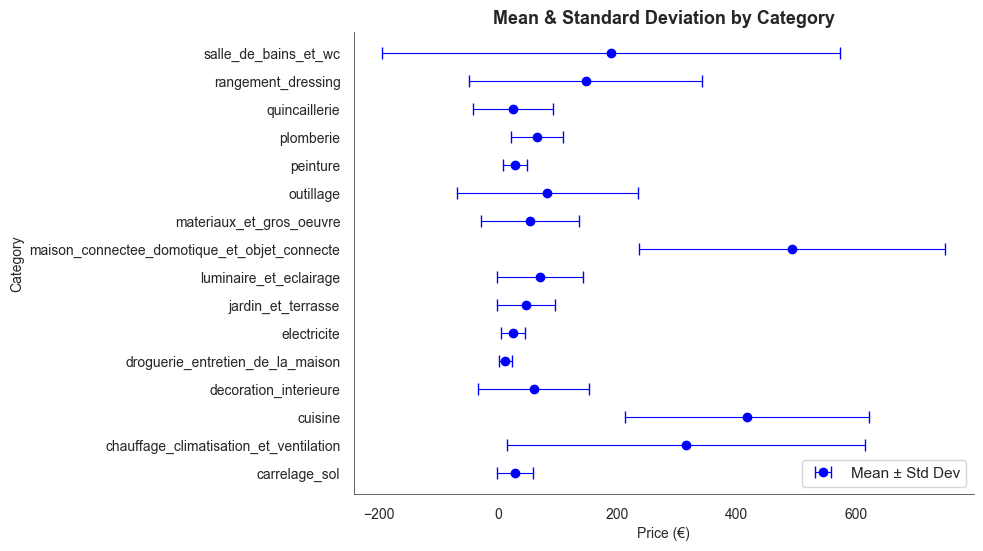

In [104]:
# override the default matplotlib style, to avoid the grey background and grid
sns.set_style("white") 

# Group by category and calculate statistics
stats = prod_df.groupby('category')['price'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Plot mean with horizontal error bars for std deviation
plt.figure(figsize=(8, 6))
plt.errorbar(
    stats['mean'], stats['category'], 
    xerr=stats['std'], fmt='o', capsize=4, label='Mean ± Std Dev', color='blue', elinewidth=0.8
)

# Adjust plot border width
for spine in plt.gca().spines.values():  # Access all spines
    spine.set_linewidth(0.5)  # Set the border (spine) line width

# Add labels, title, and adjust axes params
plt.title('Mean & Standard Deviation by Category', fontsize = 13, weight = "bold")
plt.ylabel('Category', fontsize = 10)
plt.xlabel('Price (€)', fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.legend()
sns.despine()
plt.show()

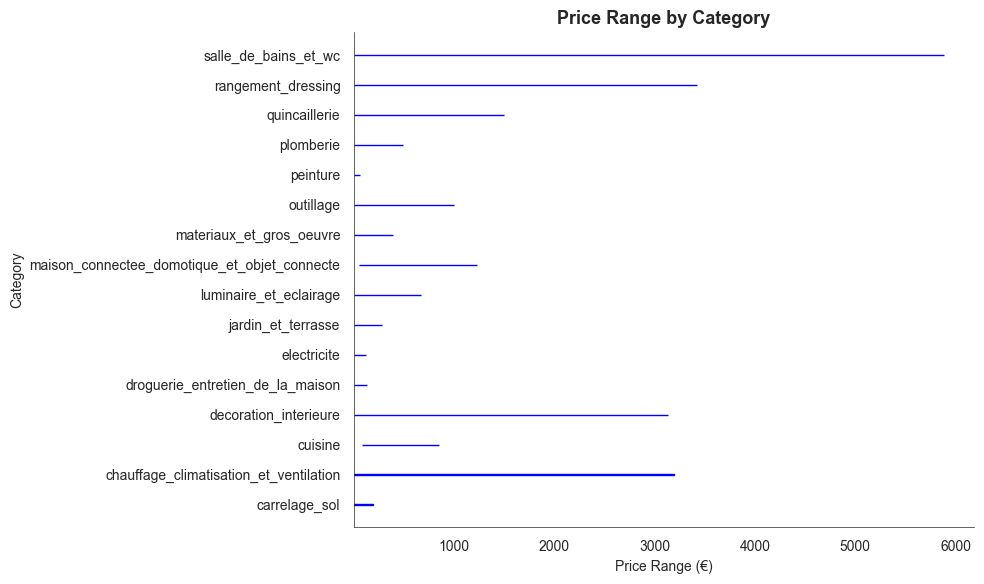

In [103]:
# override the default matplotlib style, to avoid the grey background and grid
sns.set_style("white") 

# Prepare the y positions, x_bot, and x_dif
y = np.arange(len(stats))  # positions for the categories
x_bot = stats['min']       # minimum price as the start of the bar
x_dif = stats['max'] - stats['min']  # range of the prices as the bar width

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(y, x_dif, left=x_bot, color='skyblue', edgecolor='blue', height=0.01)

# Adjust plot border width
for spine in plt.gca().spines.values():  # Access all spines
    spine.set_linewidth(0.5)  # Set the border (spine) line width

# Add labels, title, and adjust awes params
plt.title('Price Range by Category', fontsize = 13, weight = "bold")
plt.ylabel('Category', fontsize = 10)  # Label for the y-axis
plt.xlabel('Price Range (€)', fontsize = 10)  # Label for the x-axis
plt.yticks(y, stats['category'], fontsize = 10)
plt.xticks(fontsize = 10)

# Show the plot
plt.tight_layout()
sns.despine()
plt.show()

In [56]:
# Get product details for the least and most expensive products by category
min_products = prod_df.loc[prod_df.groupby('category')['price'].idxmin(), ['category', 'title', 'price']]
max_products = prod_df.loc[prod_df.groupby('category')['price'].idxmax(), ['category', 'title', 'price']]

# Merge min and max product details
min_max_products = pd.merge(
    min_products,
    max_products,
    on='category',
    suffixes=('_min', '_max')
)

# Display table as dataframe
pd.DataFrame(min_max_products)

,category,title_min,price_min,title_max,price_max
0,carrelage_sol,decapant_laitance_et_voile_de_ciment_spado_pro...,6.99,protecteur_anti_taches_effet_naturel_fila_5l,189.00
1,chauffage_climatisation_et_ventilation,pompe_manuelle_de_remplissage_pour_tous_fluide...,2.60,poele_a_pellet_freepoint_zen_airtight_noir_9.3_kw,3190.00
2,cuisine,plan_de_travail_stratifie_aspect_chene_grise_g...,84.15,lave_linge_hublot_60_cm_9kg_1200_tours/min_bos...,850.32
3,decoration_interieure,crochets_escargots_rideau_goodhome_passe_tring...,1.40,tapis_shaggy_250x350_rectangle_fait_main_noise...,3129.88
4,droguerie_entretien_de_la_maison,recharge_tete_franges_coton_l.12_x_h.35_cm,1.60,serpilliere_electrique_karcher_ewm2_blanc,135.00
5,electricite,multiprise_3_prises_blanc_1_m_16a_3680w_230_v,2.75,projecteur_de_chantier_boch_18v_1900_lumens,119.00
6,jardin_et_terrasse,brosse_a_main_interieur_et_exterieur,2.29,balayeuse_aspirateur_pour_gazon_artificiel_rol...,279.00
7,luminaire_et_eclairage,spot_a_piquer_led_a_energie_solaire_ip44_0.06w...,0.90,zafferano_super_o_lampadaire_led_blanc_recharg...,675.00
8,maison_connectee_domotique_et_objet_connecte,controleur_wi_fi_konyks_pour_radiateurs_electr...,49.90,radiateur_electrique_double_coeur_de_chauffe_l...,1230.00
9,materiaux_et_gros_oeuvre,sachet_absorbeurs_d_humidite_20m²_500g,2.99,plaque_de_construction_a_carreler_en_mortier_d...,392.00


In [28]:
pivoted = prod_df.pivot_table(index=prod_df.index, columns='category', values='price')

In [48]:
category_corr = pivoted.corr()

In [ ]:
# pd.reset_option('display.max_colwidth')
category_corr

In [ ]:
g = sns.catplot(
    data=prod_df,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(df.select_dtypes('number').corr(), 
#             annot=True,
#             cmap="Blues",
#             fmt=".2f",
#             linewidths=.5)

# plt.title("Heatmap de la matrice de corrélation")
# plt.show()